<a href="https://colab.research.google.com/github/mehadisaki/Sales-Forecasting-model-development-/blob/main/Sales_Forecasting_model_development_ARIMA%C2%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.4 MB/s 
     |████████████████████████████████| 9.8 MB 28.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#! pip install statsmodel

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split
import itertools
import statsmodels.api as sm
import pmdarima as pm
from pmdarima.arima.utils import ndiffs 
from pmdarima import arima
import time

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.eval_measures import rmse, mse
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima 
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults



from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
images_dir = '/content/gdrive/My Drive/TS - forcast project/images'


Mounted at /content/gdrive


In [ ]:
# ! pip install stldecompose

In [ ]:
#! pip install --upgrade Cython
#! pip install --upgrade git+https://github.com/statsmodels/statsmodels

In [ ]:
#url = 'https://github.com/mehadisaki/Sales-Forecasting-model-development-/blob/main/TV%20Delivery_2016-2022.xlsx?raw=true'
url = 'https://github.com/mehadisaki/Sales-Forecasting-model-development-/blob/main/walton%20TV%20Delivery_2016-2022-m.xlsx?raw=true'
# taking link from view raw'

## indexing with datetime
df =pd.read_excel(url,index_col='Month',parse_dates=['Month'])
df.sort_index(inplace = True)

In [ ]:
 df.head()

,SIZE,Year,Delivery
Month,,,
2016-01-01,"28"" ( 711 mm )",2016,2296
2016-01-01,"32"" ( 813 mm )",2016,4513
2016-01-01,"43"" ( 1.09 m )",2016,436
2016-01-01,"24"" ( 610 mm )",2016,7236
2016-01-01,"55"" ( 1.397 m )",2016,147


In [ ]:
df.dtypes

SIZE        object
Year         int64
Delivery     int64
dtype: object

In [ ]:
# select 32" TV
df32 = df[['Delivery']].loc[df["SIZE"] == "32\" ( 813 mm )"]

In [ ]:
df32.tail()

,Delivery
Month,
2021-11-01,18689
2021-12-01,15909
2022-01-01,22520
2022-02-01,26059
2022-03-01,24387


In [ ]:
## data type
type(df32)

pandas.core.frame.DataFrame

In [ ]:
df32.isnull().sum()

Delivery    0
dtype: int64

In [ ]:
df32.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
      

In [ ]:
df32.dtypes


Delivery    int64
dtype: object

##Ploting

Ploting data without datetime indexing

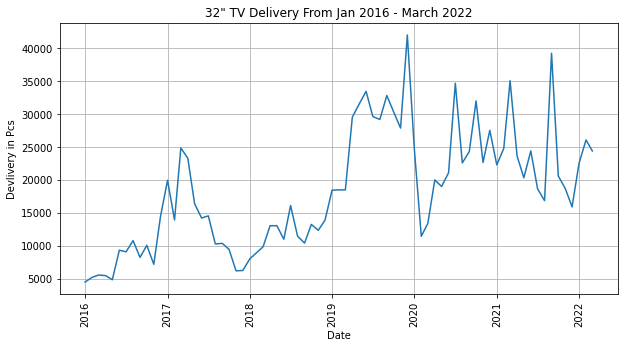

In [ ]:
# plot the time series data


plt.figure(figsize=[10, 5])
plt.plot (df32['Delivery'])
plt.title('32" TV Delivery From Jan 2016 - March 2022')
plt.ylabel('Devlivery in Pcs')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig(f"{images_dir}/Sale_org.png")
plt.show()

Ploting time series with datetime indexing


In [71]:
# making serise  data from dataframe
data32_i= df32['Delivery']

In [30]:
data32_i.head()

Month
2016-01-01    4513
2016-02-01    5225
2016-03-01    5583
2016-04-01    5493
2016-05-01    4864
Name: Delivery, dtype: int64

In [31]:
type(data32_i)

pandas.core.series.Series

In [32]:
data32_i.dtypes

dtype('int64')

##ACF PCCF

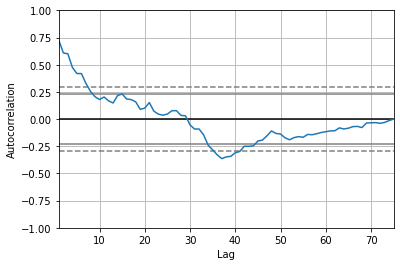

In [33]:
autocorrelation_plot(data32_i)
plt.savefig(f"{images_dir}/Autocorr.png")
plt.show()

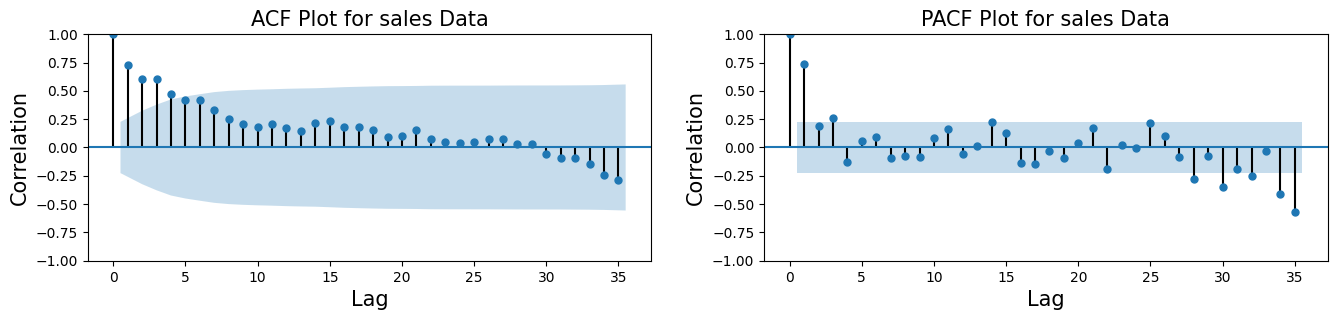

In [34]:
# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig = plt.figure(figsize=(16,3), dpi= 100)
axes1 = fig.add_subplot(121)
plot_acf(data32_i.tolist(), lags=35, ax=axes1)

plt.title("ACF Plot for sales Data", fontsize=15)
plt.ylabel("Correlation",fontsize=15)
plt.xlabel("Lag",fontsize=15)


axes2 = fig.add_subplot(122)
plot_pacf(data32_i.tolist(), lags=35, ax=axes2)
plt.title("PACF Plot for sales Data", fontsize=15)
plt.ylabel("Correlation",fontsize=15)
plt.xlabel("Lag",fontsize=15)
plt.savefig("ACF-PACF.png")
plt.savefig(f"{images_dir}/ACF-PACF.png")
plt.show()


##Decomposition

In [ ]:
data32_i.head()

Month
2016-01-01    4513
2016-02-01    5225
2016-03-01    5583
2016-04-01    5493
2016-05-01    4864
Name: Delivery, dtype: int64

<Figure size 720x720 with 0 Axes>

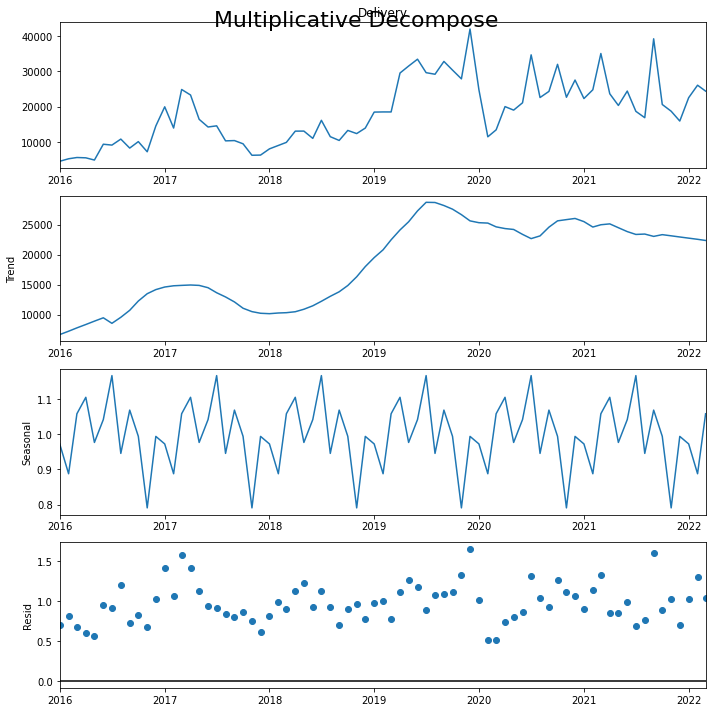

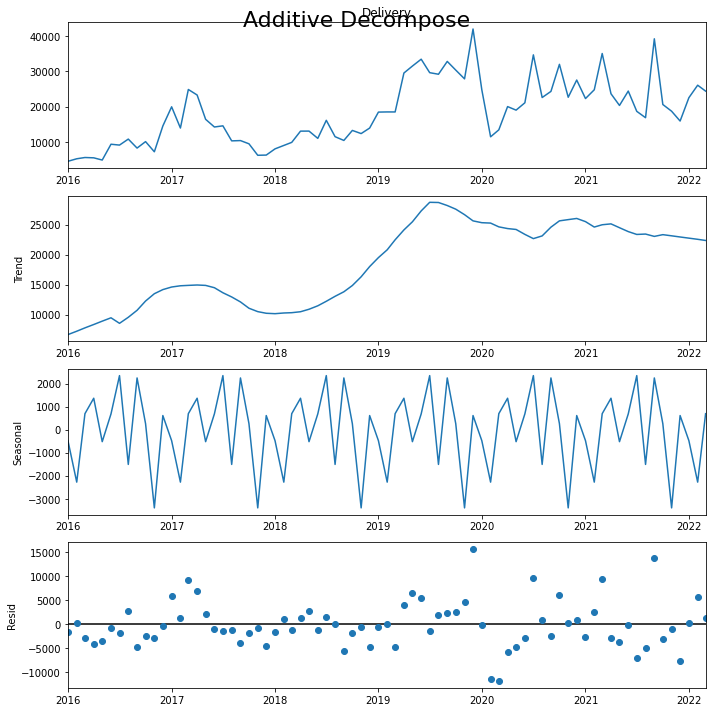

In [35]:
#Decomposition by STL
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition 
result_mul = seasonal_decompose(data32_i, model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(data32_i, model='additive', extrapolate_trend='freq')

# Plot

plt.rcParams.update({'figure.figsize': (10,10)})
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
plt.savefig("MUl_d.png")
plt.savefig(f"{images_dir}/MUl_dcompose.png")
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.savefig("add_d.png")
plt.savefig(f"{images_dir}/add_dcompose.png")
plt.show()

##Seasonality test

The Canova-Hansen test for seasonal differences. Canova and Hansen (1995) proposed a test statistic for the null hypothesis that the seasonal pattern is stable. The test statistic can be formulated in terms of seasonal dummies or seasonal cycles. The former allows us to identify seasons (e.g. months or quarters) that are not stable, while the latter tests the stability of seasonal cycles (e.g. cycles of period 2 and 4 quarters in quarterly data). [1]

In [ ]:
#https://alkaline-ml.com/pmdarima/index.html
#import pmdarima as pm
#pm.arima.CHTest(12)

STL decomposition

# ARIMA

## Make the data Stationary

Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

### Test for stationary






1. Augmented Dickey Fuller test (ADH Test)
2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
3. Philips Perron test (PP Test)



In [38]:
# sales quantity
tdf = df32
#using pmdarima package
arima.ADFTest(alpha=0.05, k=2).is_stationary(tdf)
arima.ADFTest(alpha=0.05, k=2).is_stationary(tdf)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  """


(0.34805978074295496, True)

In [39]:
 arima.KPSSTest(alpha=0.05).should_diff(tdf)


(0.01, True)

In [40]:
from statsmodels.tsa.stattools import adfuller, kpss
tdf = data32_i
# ADF Test
result = adfuller(tdf.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(tdf.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.0968794004457743
p-value: 0.24577126036308022
Critial Values:
   1%, -3.524624466842421
Critial Values:
   5%, -2.9026070739026064
Critial Values:
   10%, -2.5886785262345677

KPSS Statistic: 0.871539
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


In [41]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(tdf)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -2.096879
p-value: 0.245771


### Find the difference value (d)

In [42]:
from pmdarima.arima.utils import ndiffs, nsdiffs
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
tdf = data32_i

## Adf Test
print(ndiffs(tdf, test='adf'))  # 2

# KPSS test
print ( ndiffs(tdf, test='kpss'))  # 0

# PP test:
print(ndiffs(tdf, test='pp'))

1
1
0


In [43]:
#Seasonal deferencing check
 
## OCSBTest Test
print(nsdiffs(tdf,m=12, test='ocsb'))  # 2

# CHTest test
print ( nsdiffs(tdf, m=12, test='ch'))  # 0



0
0


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/seasonality.py:229: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frec = np.ones(int((s + 1) / 2), dtype=np.int)


### Take Difference

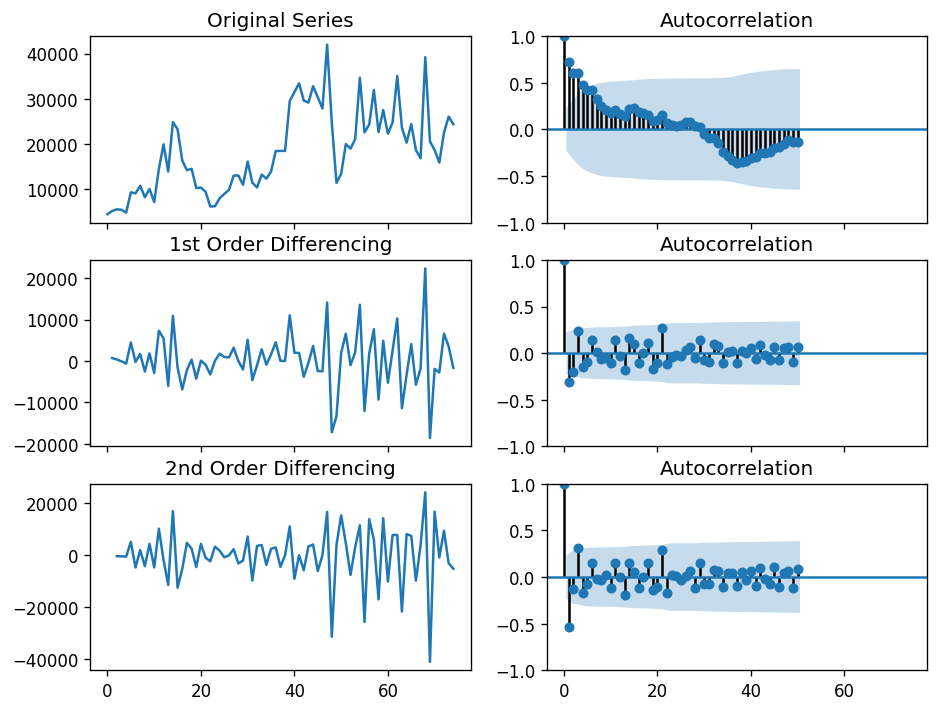

In [44]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)

axes[0, 0].plot(data32_i.values); axes[0, 0].set_title('Original Series')
plot_acf(data32_i.values,lags=50, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data32_i.diff().values) 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(data32_i.diff().dropna().values,lags=50, ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data32_i.diff().diff().values)
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data32_i.diff().diff().dropna().values,lags=50, ax=axes[2, 1])


plt.savefig("diferencing.png")
plt.savefig(f"{images_dir}/diferencing.png")

plt.show()

## Parameter Selection for SARIMA


In [45]:
p=q=d= range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12)  for x in list(itertools.product(p,d,q))]

In [46]:
print('SARIMA: {} x {}'. format(pdq[1], seasonal_pdq[1]))

SARIMA: (0, 0, 1) x (0, 0, 1, 12)


In [47]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data32_i,order=param,seasonal_order=param_seasonal, enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
          continue

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1681.716066625387
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1382.2096946727902
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1334.5305294530067
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1078.3492780215458
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1358.434359672148
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1331.341491778488
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1093.0082631647956
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1084.1794439978755
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1616.0240485937904
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1346.9627762078123
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1289.1871994670355
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1036.2199174621458
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1384.8993312386474
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1342.0135396322055
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1076.4336626732425
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1037.4924386560278
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1491.6046197023334
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1260.066809159

## ARIMA model

ARIMA model with autoArima

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1512.861, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1507.352, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1502.221, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1510.995, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1503.907, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1503.395, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1502.994, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1500.633, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1502.047, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1501.748, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1505.627, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1501.690, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.408 seconds


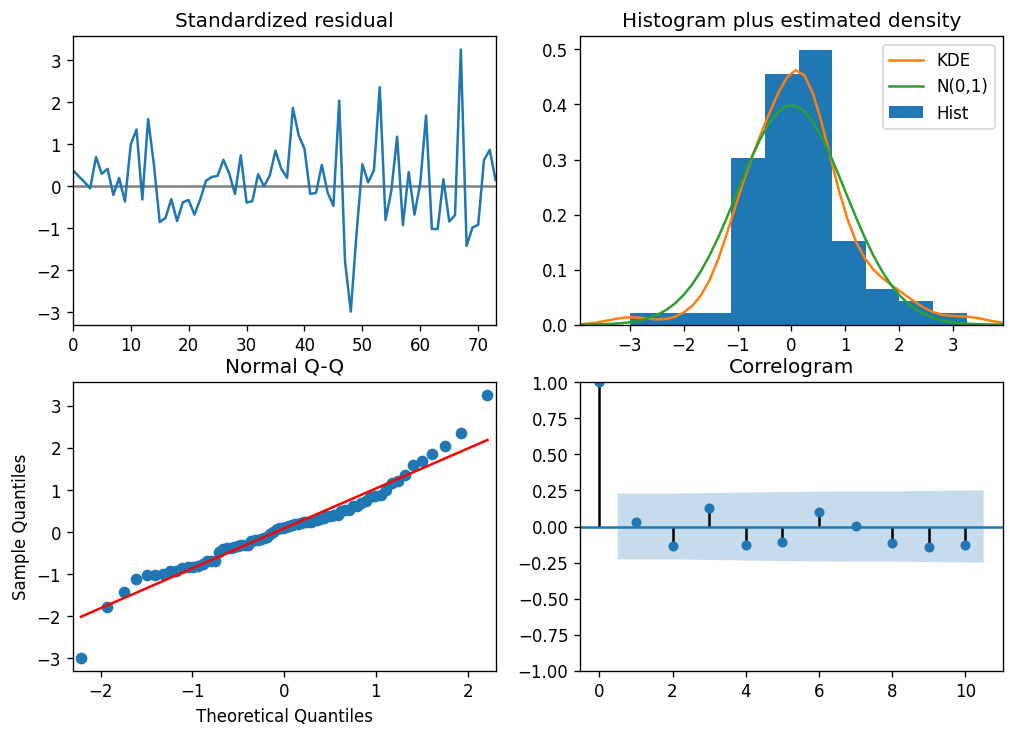

<Figure size 1080x840 with 0 Axes>

In [68]:
arima_model_order =  auto_arima(tdf,start_p=0, d=None, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, test='kpss', seasonal_test='ocsb', error_action='warn',
                          trace = True, supress_warnings=True,stepwise = True,
                          random_state=None, n_fits = 50)

arima_model_order.plot_diagnostics(figsize=(10,7))
plt.show()
plt.savefig("ARIM-model.png")
plt.savefig(f"{images_dir}/ARIM-model.png")

In [49]:
auto_arima(data32_i, seasonal=True, m=12,max_p=7, max_d=3,max_q=5, max_P=7, max_D=3,max_Q=4).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   75
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -748.316
Date:                Fri, 22 Apr 2022   AIC                           1500.633
Time:                        06:11:56   BIC                           1505.241
Sample:                             0   HQIC                          1502.471
                                 - 75                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4790      0.103     -4.649      0.000      -0.681      -0.277
sigma2      3.899e+07   2.84e-10   1.37e+17      0.000     3.9e+07     3.9e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                11.53
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               3.28   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

## Model build up

In [54]:
df32.head()

,Delivery
Month,
2016-01-01,4513
2016-02-01,5225
2016-03-01,5583
2016-04-01,5493
2016-05-01,4864


In [57]:
#Split into test and train data
train_data, test_data = train_test_split(df32, test_size=0.10, shuffle = False)
print("Train data")
print(train_data.head())
print("Test Data")
print(test_data.tail())

Train data
            Delivery
Month               
2016-01-01      4513
2016-02-01      5225
2016-03-01      5583
2016-04-01      5493
2016-05-01      4864
Test Data
            Delivery
Month               
2021-11-01     18689
2021-12-01     15909
2022-01-01     22520
2022-02-01     26059
2022-03-01     24387


# ARIMA model

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


                               SARIMAX Results                                
Dep. Variable:               Delivery   No. Observations:                   67
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -661.782
Date:                Fri, 22 Apr 2022   AIC                           1327.563
Time:                        06:16:05   BIC                           1331.942
Sample:                    01-01-2016   HQIC                          1329.293
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3691      0.109     -3.401      0.001      -0.582      -0.156
sigma2      3.314e+07   3.98e-10   8.33e+16      0.000    3.31e+07    3.31e+07
Ljung-Box (L1) (Q):                   0.02   Jarque-

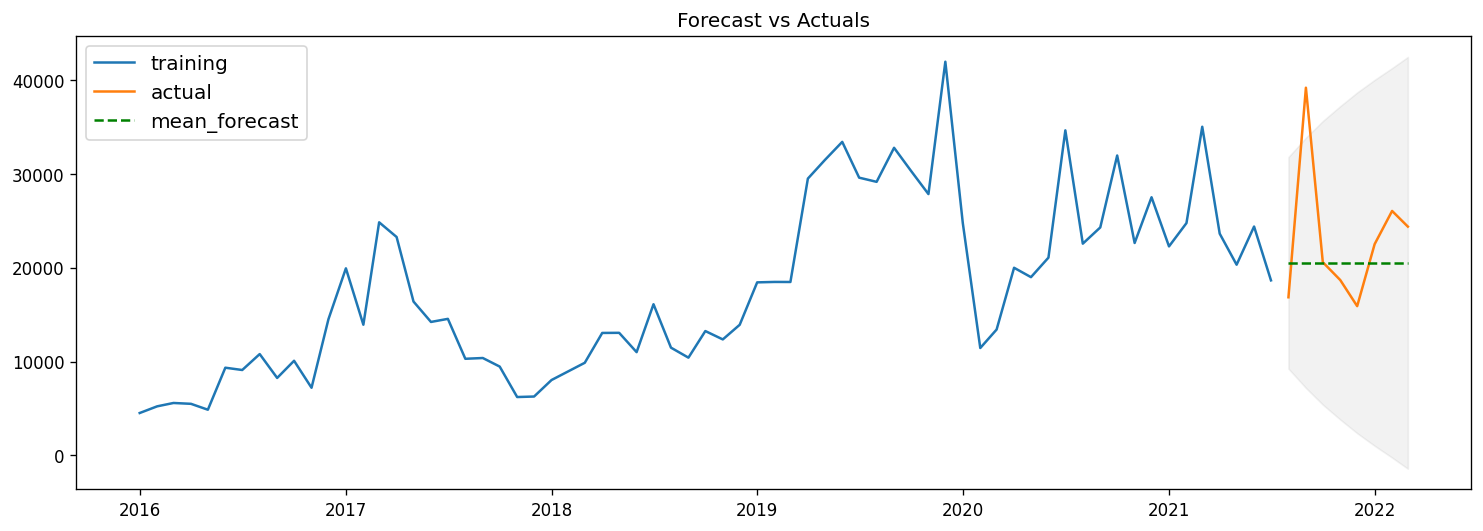

In [58]:
# Build Model
#timestamp = time.time()
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train_data, order= arima_model_order.order, enforce_stationarity=True )  
fitted = model.fit()  

print(fitted.summary())
fcast = fitted.get_forecast(len(test_data), alpha=0.05).summary_frame()

# plot the forcasting data
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')

plt.plot(fcast['mean'],'g--', label='mean_forecast')

ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.05);
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Forecast_ARIMA.png')
plt.savefig(f"{images_dir}/Forecast_ARIMA.png")

In [59]:
print(fcast)

Delivery            mean       mean_se  mean_ci_lower  mean_ci_upper
2021-08-01  20526.636546   5757.162785    9242.804835   31810.468256
2021-09-01  20526.636546   6807.148074    7184.871482   33868.401609
2021-10-01  20526.636546   7715.543175    5404.449801   35648.823290
2021-11-01  20526.636546   8527.716463    3812.619408   37240.653683
2021-12-01  20526.636546   9268.996151    2359.737917   38693.535175
2022-01-01  20526.636546   9955.231350    1014.741642   40038.531449
2022-02-01  20526.636546  10597.120968    -243.338891   41296.611983
2022-03-01  20526.636546  11202.290587   -1429.449549   42482.722640


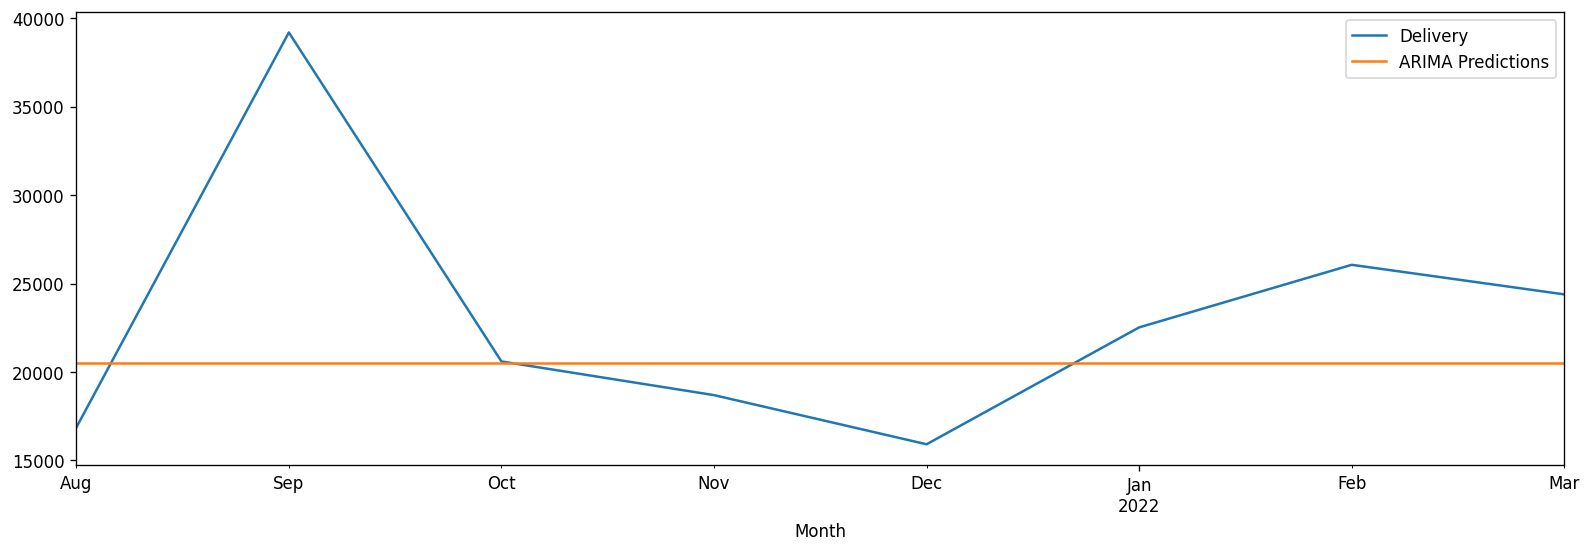

In [60]:
## Check with test data
arima_pred = fitted.predict(start = len(train_data), end = len(tdf)-1, typ="levels").rename("ARIMA Predictions")
test_data.plot(figsize = (16,5), label="Actual",legend=True)
arima_pred.plot(legend= True)
plt.savefig('Forecast_train.png')
plt.savefig(f"{images_dir}/Forecast_train.png")

### Error Calculation

In [61]:
def calculate_error_measures(X, Y):
    
    """
    Function to calculate the mean squared error, mean absolute error and the coefficient of determination (r2) between two lists.
    ...
    Attributes
    ----------
    X : list
    
    Y : list
    
    """
    
        
    MSE = mean_squared_error(X, Y)
    print('Mean Squared Error(MSE): ', MSE)
    
    MAE = mean_absolute_error(X, Y)
    print('Mean Absolute Error(MAE): ', MAE)
    RMSE =mean_squared_error(X, Y,squared=False)
    print('Root Mean Squared Error(RMSE):', RMSE )
    #squared bool, default=True If True returns MSE value, if False returns RMSE value.
    error_measures = [MSE, MAE,RMSE]
    return error_measures

In [62]:
print("Error measures for ARIMA:")
from sklearn.metrics import mean_squared_error, mean_absolute_error
calculate_error_measures(test_data, fcast['mean'])


Error measures for ARIMA:
Mean Squared Error(MSE):  54545297.5062403
Mean Absolute Error(MAE):  5031.7158635866
Root Mean Squared Error(RMSE): 7385.478827147249


[54545297.5062403, 5031.7158635866, 7385.478827147249]

In [63]:
# RSE and MSE using stats model
arima_rmse_error = rmse(test_data, arima_pred)
arima_mse_error = mse(test_data, arima_pred)
print (arima_rmse_error )
print (arima_mse_error )

[7385.47882715 7385.47882715 7385.47882715 7385.47882715 7385.47882715
 7385.47882715 7385.47882715 7385.47882715]
[54545297.5062403 54545297.5062403 54545297.5062403 54545297.5062403
 54545297.5062403 54545297.5062403 54545297.5062403 54545297.5062403]


In [64]:
calculate_error_measures(test_data, arima_pred)

Mean Squared Error(MSE):  54545297.5062403
Mean Absolute Error(MAE):  5031.7158635866
Root Mean Squared Error(RMSE): 7385.478827147249


[54545297.5062403, 5031.7158635866, 7385.478827147249]

# new model stepwise_ARIMA

In [69]:
def stepwise_ARIMA(train_data, test_data, optimal_order):
    
    """
    Function to perform stepwise ARIMA forecasting.
    ...
    Attributes
    ----------
    train_data : list
    
    test_data : list
    
    optimal_order : tuple
        Optimal order of the ARIMA model, determined by the auto_arima function in the pmdarima library.
   
    """
    
    history = [x for x in train_data]
    model_predictions = []
    N_test_observations = len(test_data)
    for time_point in range(N_test_observations):
        model = ARIMA(history, order=optimal_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        model_predictions.append(yhat)
        true_test_value = test_data[time_point]
        history.append(true_test_value)
    return model_predictions

In [72]:
#Split into test and train data 
# Need serise data use data32_i
train_data, test_data = train_test_split(data32_i, test_size=0.10, shuffle = False)
print("Train data")
print(train_data.head())
print("Test Data")
print(test_data.tail())

Train data
Month
2016-01-01    4513
2016-02-01    5225
2016-03-01    5583
2016-04-01    5493
2016-05-01    4864
Name: Delivery, dtype: int64
Test Data
Month
2021-11-01    18689
2021-12-01    15909
2022-01-01    22520
2022-02-01    26059
2022-03-01    24387
Name: Delivery, dtype: int64


In [74]:
model_predictions_step = stepwise_ARIMA(train_data,test_data, arima_model_order.order)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


In [75]:
calculate_error_measures(test_data, model_predictions_step)

Mean Squared Error(MSE):  83955962.9210428
Mean Absolute Error(MAE):  7104.319755753979
Root Mean Squared Error(RMSE): 9162.748655345884


[83955962.9210428, 7104.319755753979, 9162.748655345884]

In [76]:
model_predictions_step

[20526.6365456536,
 18156.375376550193,
 30527.1362756512,
 24856.801391717305,
 21654.198843544917,
 18554.95602444452,
 20669.026869422534,
 23468.85674011795]

In [77]:
test_data

Month
2021-08-01    16855
2021-09-01    39200
2021-10-01    20594
2021-11-01    18689
2021-12-01    15909
2022-01-01    22520
2022-02-01    26059
2022-03-01    24387
Name: Delivery, dtype: int64

## Model with Seasonality

In [78]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(tdf, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1308.782, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1295.057, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1306.997, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1291.593, Time=0.35 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1291.689, Time=1.05 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1291.500, Time=0.32 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1295.625, Time=0.08 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1290.225, Time=0.30 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1292.810, Time=0.11 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=in

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   75
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -635.031
Date:                                 Fri, 22 Apr 2022   AIC                           1280.063
Time:                                         06:24:38   BIC                           1290.698
Sample:                                              0   HQIC                          1284.238
                                                  - 75                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -81.7140    144.042     -0.567      0.571    -364.030     200.602
ma.L1         -0.4335      0.098     -4.404      0.000      -0.626      -0.241
ma.S.L12      -1.0615      0.216     -4.924      0.000      -1.484      -0.639
ma.S.L24       0.1997      0.209      0.954      0.340      -0.210       0.610
sigma2      3.968e+07      0.001   7.48e+10      0.000    3.97e+07    3.97e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 9.17
Prob(Q):                              0.63   Prob(JB):                         0.01
Heteroskedasticity (H):               5.47   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.44e+26. Standard errors may be unstable.
"""

Model  with PM library 

In [79]:
type(train_data)

pandas.core.series.Series

In [80]:
# Fit an ARIMA

pmarima = pm.auto_arima(train_data, seasonal=True, m=12)
pmmodel = pmarima.fit(train_data)
pmpred = pmmodel.fit_predict(test_data)
pmmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    8
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 -73.410
Date:                Fri, 22 Apr 2022   AIC                            154.821
Time:                        06:25:05   BIC                            154.605
Sample:                             0   HQIC                           152.147
                                  - 8                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0353      1.155      0.031      0.976      -2.229       2.300
ar.L2         -0.6951      0.310     -2.245      0.025      -1.302      -0.088
ma.L1         -1.0000      0.687     -1.455      0.146      -2.347       0.347
sigma2      4.889e+07   1.41e-08   3.48e+15      0.000    4.89e+07    4.89e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.13   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.14   Prob(JB):                         0.79
Heteroskedasticity (H):               0.12   Skew:                             0.31
Prob(H) (two-sided):                  0.22   Kurtosis:                         1.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.88e+32. Standard errors may be unstable.
"""

# SARIMA

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


                                        SARIMAX Results                                        
Dep. Variable:                                Delivery   No. Observations:                   67
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -551.980
Date:                                 Fri, 22 Apr 2022   AIC                           1113.960
Time:                                         06:26:50   BIC                           1123.905
Sample:                                     01-01-2016   HQIC                          1117.796
                                          - 07-01-2021                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -5.8652     12.411     -0.473      0.637     -30.190      18

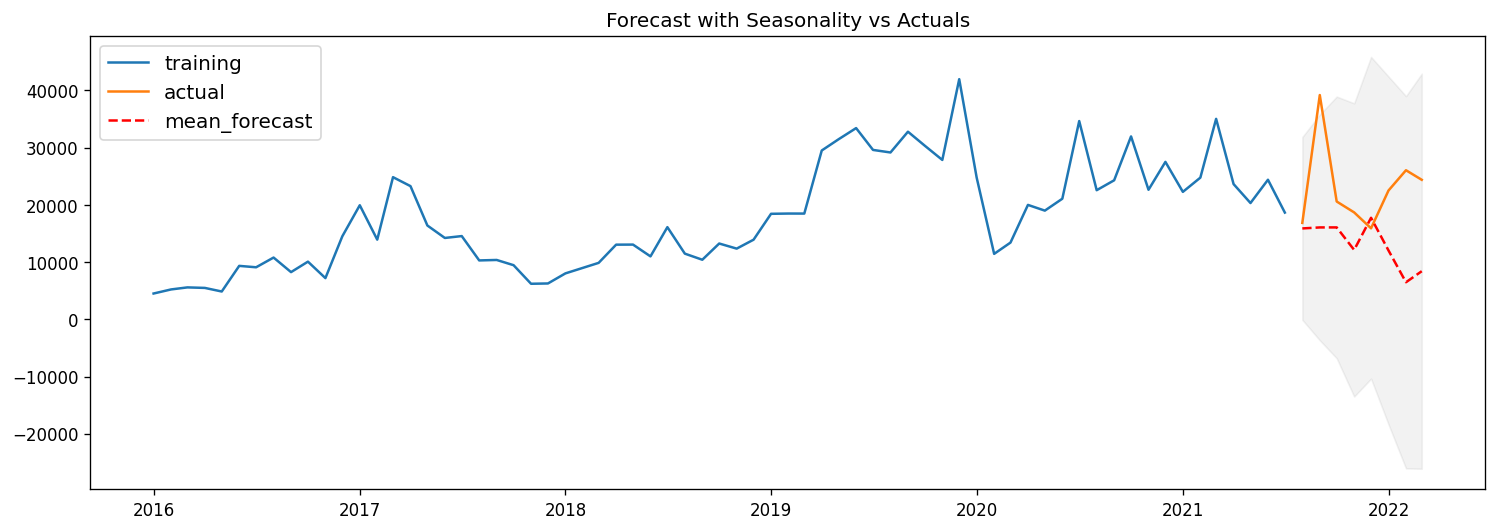

In [82]:

Fmodel=SARIMAX(train_data,order=(0, 1, 1),seasonal_order=(0,1,2,12),trend='t',enforce_stationarity=True,
                                            enforce_invertibility=False)
Sarimares=Fmodel.fit()

print(Sarimares.summary())
fscast = Sarimares.get_forecast(len(test_data), alpha=0.05).summary_frame()
#pfcast = fitted.forecast(12, alpha=0.05)
#Afcast = fitted.get_forecast(train_data, alpha=0.05).summary_frame()
# plot the forcasting data
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')

plt.plot(fscast['mean'],'r--', label='mean_forecast')
#plt.plot(pfcast, 'bo',label='forecast')
#train_data.plot(  ax=ax)
#test_data.plot( ax=ax)
#fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fscast.index, fscast['mean_ci_lower'], fscast['mean_ci_upper'], color='k', alpha=0.05);
plt.title('Forecast with Seasonality vs Actuals')
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Forecast_SARIMA.png')
plt.savefig(f"{images_dir}/Forecast_SARIMA.png")

Test data vs predicted 

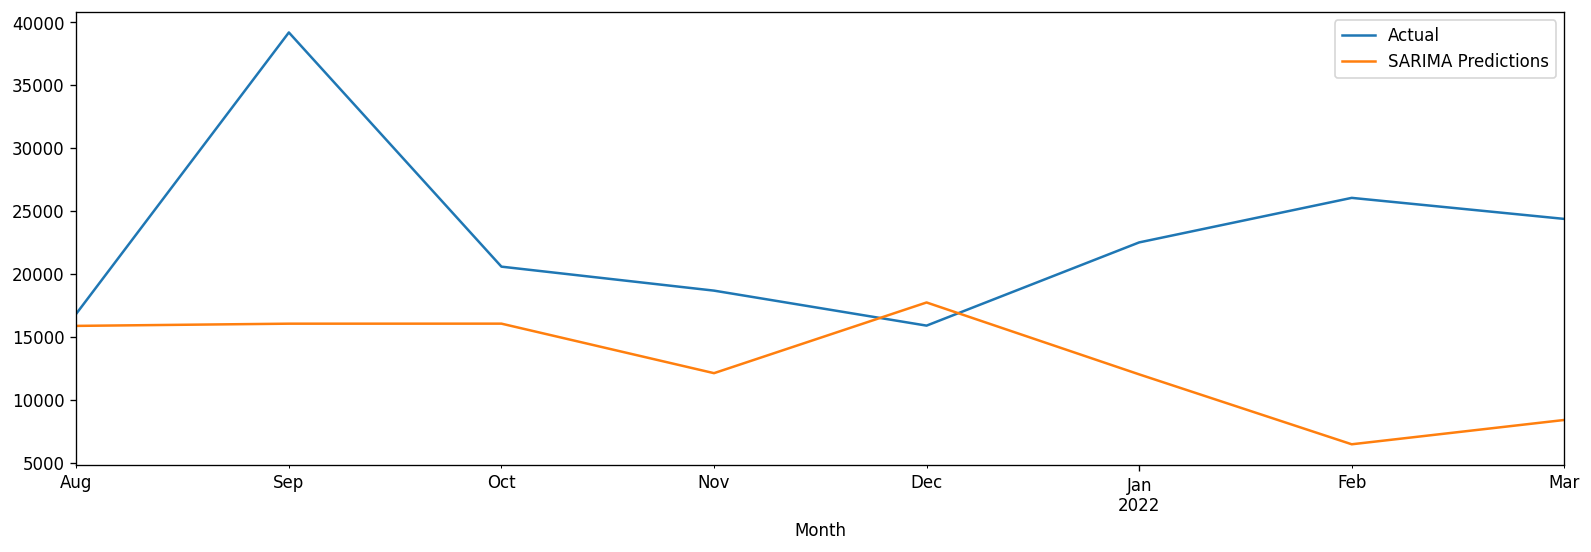

In [83]:
Sarima_pred = Sarimares.predict(start = len(train_data), end = len(tdf)-1, typ="levels").rename("SARIMA Predictions")
test_data.plot(figsize = (16,5), label="Actual",legend=True)
Sarima_pred.plot(legend= True)
plt.savefig('Forecast_train_with_Seasonal.png')
plt.savefig(f"{images_dir}/Forecast_train_with_Seasonal.png")

In [84]:
print(Sarimares.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -5.8652     12.411     -0.473      0.637     -30.190      18.460
ma.L1         -0.2756      0.185     -1.490      0.136      -0.638       0.087
ma.S.L12      -0.8703      0.351     -2.478      0.013      -1.559      -0.182
ma.S.L24       0.2396      0.509      0.471      0.638      -0.758       1.237
sigma2       6.64e+07   9.58e-07   6.93e+13      0.000    6.64e+07    6.64e+07


In [85]:
calculate_error_measures(test_data, Sarima_pred)

Mean Squared Error(MSE):  168925397.40365788
Mean Absolute Error(MAE):  10382.685265657168
Root Mean Squared Error(RMSE): 12997.13035264546


[168925397.40365788, 10382.685265657168, 12997.13035264546]

In [86]:
calculate_error_measures(test_data, arima_pred)

Mean Squared Error(MSE):  54545297.5062403
Mean Absolute Error(MAE):  5031.7158635866
Root Mean Squared Error(RMSE): 7385.478827147249


[54545297.5062403, 5031.7158635866, 7385.478827147249]

In [ ]:
#(1, 0, 1)x(0, 1, 1, 12)12

# Trial with other model

                               SARIMAX Results                                
Dep. Variable:               Delivery   No. Observations:                   67
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -657.418
Date:                Thu, 21 Apr 2022   AIC                           1322.835
Time:                        02:51:20   BIC                           1331.594
Sample:                    01-01-2016   HQIC                          1326.296
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9016      0.178     -5.068      0.000      -1.250      -0.553
ar.L2         -0.4521      0.093     -4.870      0.000      -0.634      -0.270
ma.L1          0.6782      0.177      3.830      0.0

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


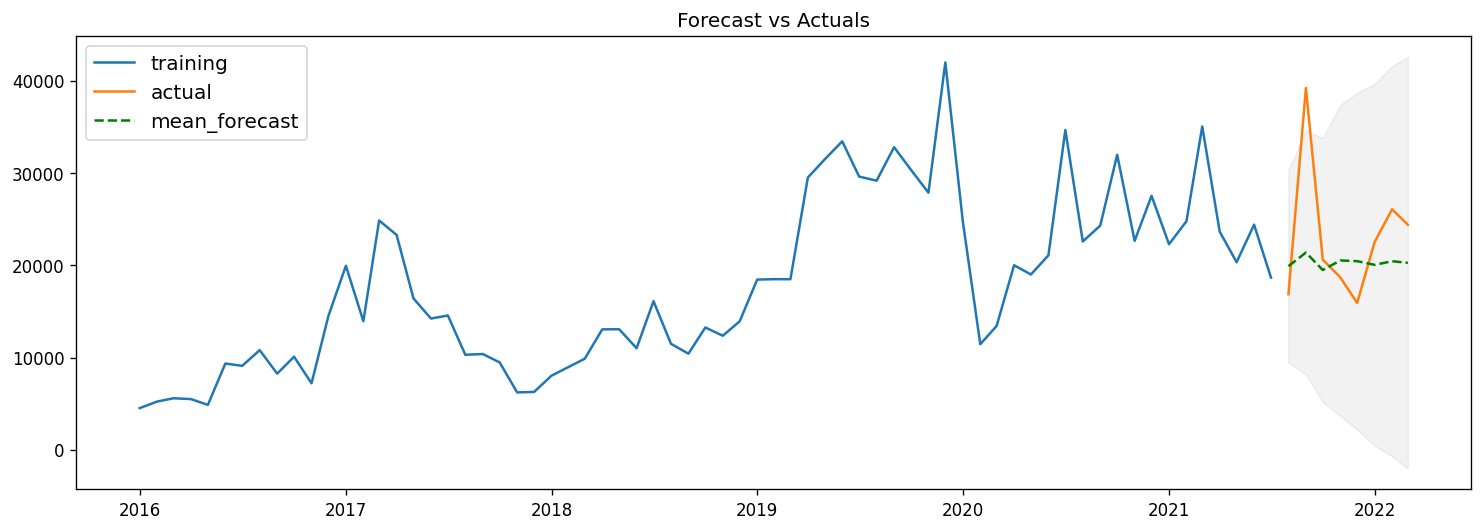

In [ ]:
# Build Model
timestamp = time.time()
# model = ARIMA(train, order=(3,2,1))  
pmodel = ARIMA(train_data, order= (2,1,1))  
pfitted = pmodel.fit()  

print(pfitted.summary())
fpcast = pfitted.get_forecast(len(test_data), alpha=0.05).summary_frame()
#pfcast = fitted.forecast(12, alpha=0.05)
#Afcast = fitted.get_forecast(train_data, alpha=0.05).summary_frame()
# plot the forcasting data
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')

plt.plot(fpcast['mean'],'g--', label='mean_forecast')
#plt.plot(pfcast, 'bo',label='forecast')
#train_data.plot(  ax=ax)
#test_data.plot( ax=ax)
#fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fpcast.index, fpcast['mean_ci_lower'], fpcast['mean_ci_upper'], color='k', alpha=0.05);
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Forecast_ARIMA(211).png')
plt.savefig(f"{images_dir}/Forecast_ARIMA(211).png")

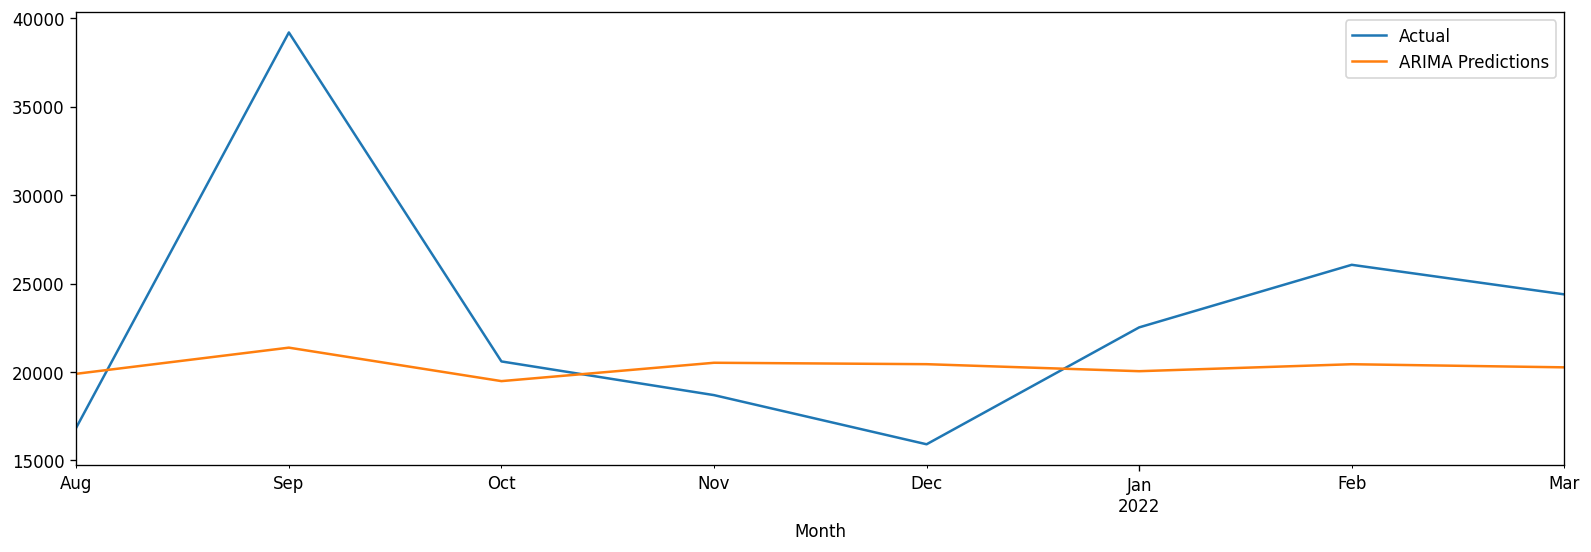

In [ ]:
p_pred = pfitted.predict(start = len(train_data), end = len(tdf)-1, typ="levels").rename("ARIMA Predictions")
test_data.plot(figsize = (16,5), label="Actual",legend=True)
p_pred.plot(legend= True)
plt.savefig('Forecast_train_with_211.png')
plt.savefig(f"{images_dir}/Forecast_train_with_211.png")

In [ ]:
calculate_error_measures(test_data, p_pred)

Mean Squared Error(MSE):  50864715.32745931
Mean Absolute Error(MAE):  5070.942263491115
Root Mean Squared Error(RMSE): 7131.950317231557


[50864715.32745931, 5070.942263491115, 7131.950317231557]

#State Space Methods

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


                        Unobserved Components Results                         
Dep. Variable:               Delivery   No. Observations:                   75
Model:                    local level   Log Likelihood                -748.573
Date:                Fri, 22 Apr 2022   AIC                           1501.146
Time:                        06:29:48   BIC                           1505.755
Sample:                    01-01-2016   HQIC                          1502.985
                         - 03-01-2022                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.818e+07   4.06e+06      4.480      0.000    1.02e+07    2.61e+07
sigma2.level      9.767e+06   4.12e+06      2.371      0.018    1.69e+06    1.78e+07
Ljung-Box (L1) (Q):         

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


                            Unobserved Components Results                            
Dep. Variable:                      Delivery   No. Observations:                   75
Model:                           local level   Log Likelihood                -728.842
                   + damped stochastic cycle   AIC                           1467.683
Date:                       Fri, 22 Apr 2022   BIC                           1479.067
Time:                               06:29:49   HQIC                          1472.215
Sample:                           01-01-2016                                         
                                - 03-01-2022                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  5.813e+06   1.97e+06      2.946      0

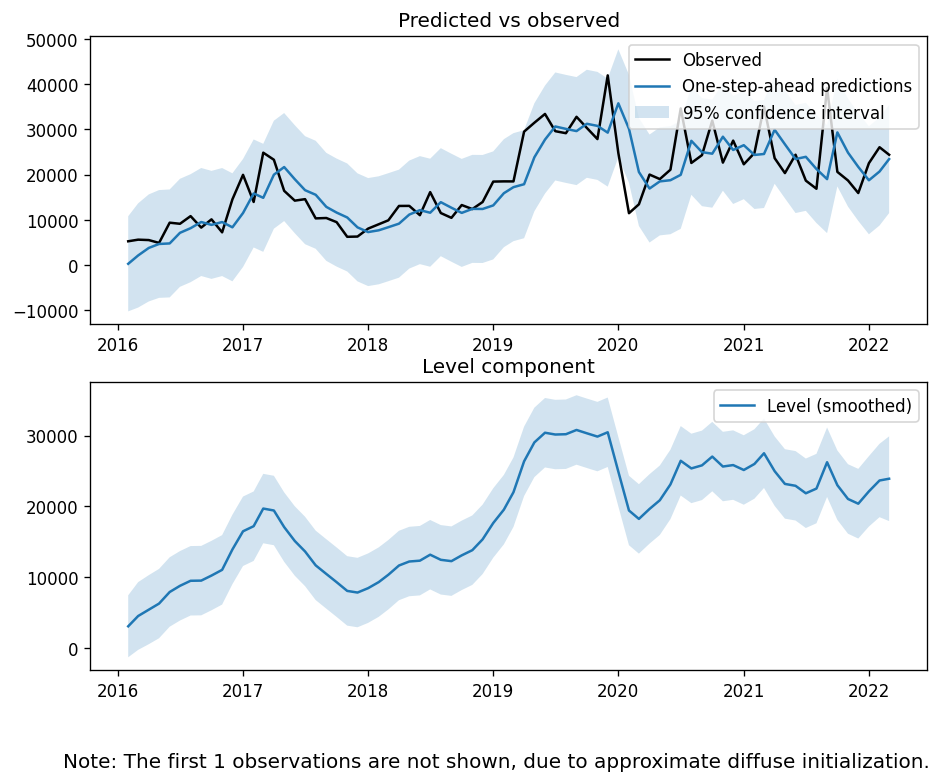

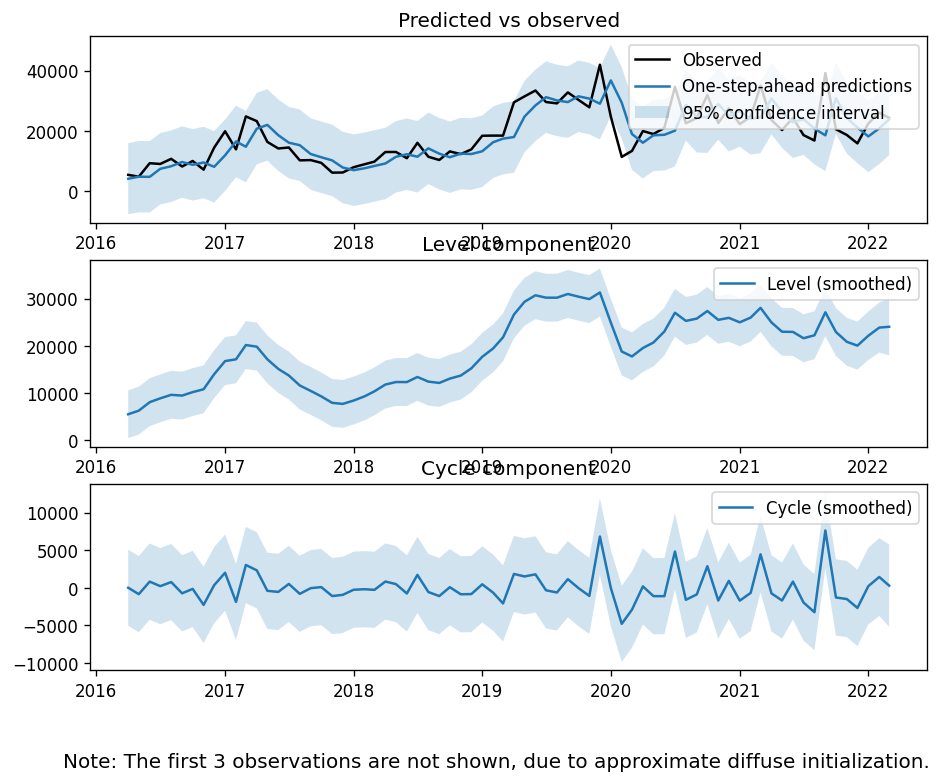

In [87]:
# Load the statsmodels api
import statsmodels.api as sm

# Load your dataset
endog = data32_i

# Fit a local level model
mod_ll = sm.tsa.UnobservedComponents(endog, 'local level')
# Note that mod_ll is an instance of the UnobservedComponents class

# Fit the model via maximum likelihood
res_ll = mod_ll.fit()
# Note that res_ll is an instance of the UnobservedComponentsResults class

# Show the summary of results
print(res_ll.summary())

# Show a plot of the estimated level and trend component series
fig_ll = res_ll.plot_components()

# We could further add a damped stochastic cycle as follows
mod_cycle = sm.tsa.UnobservedComponents(endog, 'local level', cycle=True,
                                        damped_cycle=True,
                                        stochastic_cycle=True)
res_cycle = mod_cycle.fit()

# Show the summary of results
print(res_cycle.summary())

# Show a plot of the estimated level, trend, and cycle component series
fig_cycle = res_cycle.plot_components()